# Exploratory Data Analysis

Main Author: Samuel Lim

Contributors: Sebastian Png and Clara Biedermann 

## Install Libraries 

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install nltk
# !pip install statsmodel
# !pip install textblob
# !pip install feature_engine
# !pip install openpyxl

## Import Libraries

In [2]:
import math
import re
import string
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib.dates import date2num
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action='ignore', category=FutureWarning)

## Import Dataset

In [3]:
df_full = pd.read_excel("./datasets/thesmartlocalfinal.xlsx")

# Convert publish_date to datetime format
df_full.publish_date = pd.to_datetime(arg=df_full.publish_date)
df_full.head()

url  timedelta  \
0  https://thesmartlocal.com/read/staytion-marsil...          0   
1  https://thesmartlocal.com/read/things-to-do-es...          1   
2  https://thesmartlocal.com/read/things-to-do-no...          1   
3  https://thesmartlocal.com/read/paypal-welcome-...          1   
4  https://thesmartlocal.com/read/things-to-do-ju...          1   

                                               title      category  \
0  Staytion Marsiling: Coworking Space In The Nor...      Adulting   
1  Esplanade Is Having Free Shows, A Theatre BTS ...  Things To Do   
2  17 New Things To Do In November 2022 – Bishan ...  Things To Do   
3  You Can Redeem Vouchers For Brands Like foodpa...         Local   
4  9 Best Things To Do In Jurong For Westies To S...  Things To Do   

                subcategory1 subcategory2 subcategory3  \
0                     Career          NaN          NaN   
1  Things To Do In Singapore          NaN          NaN   
2                 Activities          NaN          NaN   
3                 Businesses          NaN          NaN   
4  Things To Do In Singapore          NaN          NaN   

                                             preview  \
0  Hooray for being able to sleep in, plus the ti...   
1           Do not miss the free entertainment here.   
2  In the blink of an eye, we're approaching 2023...   
3     Vouchers can also be used on Zalora and Agoda.   
4                    Hot take: west side, best side.   

                                             content  n_tokens_title  ...  \
0  Staytion Marsiling – Coworking space in the No...              15  ...   
1  Things to do at Esplanade So you’ve been to Es...              17  ...   
2  Things to do in November 2022 Halloween may be...              19  ...   
3  PayPal’s Welcome Pack promotion With Black Fri...              16  ...   
4  Things to do in Jurong For too long, residents...              20  ...   

                                           img_links  num_hrefs  \
0  ['https://thesmartlocal.com/wp-content/uploads...         17   
1  ['https://thesmartlocal.com/wp-content/uploads...          7   
2  ['https://thesmartlocal.com/wp-content/uploads...         63   
3  ['https://thesmartlocal.com/wp-content/uploads...          4   
4  ['https://thesmartlocal.com/wp-content/uploads...         18   

   num_self_hrefs  num_tags  num_shares  \
0              17         1          27   
1               7         2          73   
2              63         6         244   
3               4         2          25   
4              18         3          31   

                                            img_dark  \
0  ['0.81' '0.65' '0.72' '0.91' '0.74' '0.33' '0....   
1               ['0.51' '0.93' '0.69' '0.34' '0.91']   
2  ['0.53' '0.35' '0.59' '0.62' '0.53' '0.74' '0....   
3               ['0.49' '0.48' '0.67' '0.51' '0.67']   
4  ['0.58' '0.79' '0.66' '0.73' '0.76' '0.74' '0....   

                                           img_light  \
0  ['0.19' '0.35' '0.28' '0.09' '0.26' '0.67' '0....   
1               ['0.49' '0.07' '0.31' '0.66' '0.09']   
2  ['0.47' '0.65' '0.41' '0.38' '0.47' '0.26' '0....   
3               ['0.51' '0.52' '0.33' '0.49' '0.33']   
4  ['0.42' '0.21' '0.34' '0.27' '0.24' '0.26' '0....   

                                      img_saturation  \
0  ['46.14' '62.21' '69.59' '52.29' '54.78' '50.8...   
1        ['85.23' '104.4' '151.83' '69.18' '100.27']   
2  ['128.23' '132.23' '102.29' '145.1' '92.48' '9...   
3          ['79.51' '73.05' '124.35' '84.41' '80.5']   
4  ['109.64' '183.59' '73.78' '93.46' '82.64' '13...   

                                        top3_colours  \
0  [array(['black', 'black', 'black'], dtype=obje...   
1  [array(['darkseagreen', 'tan', 'darkgray'], dt...   
2  [array(['black', 'black', 'black'], dtype=obje...   
3  [array(['darkslategray', 'lightgray', 'lightgr...   
4  [array(['lightsteelblue', 'silver', 'skyblue']...   

                                        bot3_colours  
0  [array([

#### Converting day using one hot encoding

In [4]:
df_full['Category'] = df_full['category']

# Mon = 0
df_full['weekday_is_monday'] = np.where(df_full['day_of_week']==0, 1, 0)
df_full['weekday_is_tuesday'] = np.where(df_full['day_of_week']==1, 1, 0)
df_full['weekday_is_wednesday'] = np.where(df_full['day_of_week']==2, 1, 0)
df_full['weekday_is_thursday'] = np.where(df_full['day_of_week']==3, 1, 0)
df_full['weekday_is_friday'] = np.where(df_full['day_of_week']==4, 1, 0)
df_full['weekday_is_saturday'] = np.where(df_full['day_of_week']==5, 1, 0)
df_full['weekday_is_sunday'] = np.where(df_full['day_of_week']==6, 1, 0)
df_full['is_weekend'] = np.where(df_full['day_of_week'] > 4, 1, 0)


df_full = pd.get_dummies(df_full, columns=['category'])
# ignore subcat 1,2,3
df_full.columns=df_full.columns.str.replace(" ","")

df_full.head()

url  timedelta  \
0  https://thesmartlocal.com/read/staytion-marsil...          0   
1  https://thesmartlocal.com/read/things-to-do-es...          1   
2  https://thesmartlocal.com/read/things-to-do-no...          1   
3  https://thesmartlocal.com/read/paypal-welcome-...          1   
4  https://thesmartlocal.com/read/things-to-do-ju...          1   

                                               title  \
0  Staytion Marsiling: Coworking Space In The Nor...   
1  Esplanade Is Having Free Shows, A Theatre BTS ...   
2  17 New Things To Do In November 2022 – Bishan ...   
3  You Can Redeem Vouchers For Brands Like foodpa...   
4  9 Best Things To Do In Jurong For Westies To S...   

                subcategory1 subcategory2 subcategory3  \
0                     Career          NaN          NaN   
1  Things To Do In Singapore          NaN          NaN   
2                 Activities          NaN          NaN   
3                 Businesses          NaN          NaN   
4  Things To Do In Singapore          NaN          NaN   

                                             preview  \
0  Hooray for being able to sleep in, plus the ti...   
1           Do not miss the free entertainment here.   
2  In the blink of an eye, we're approaching 2023...   
3     Vouchers can also be used on Zalora and Agoda.   
4                    Hot take: west side, best side.   

                                             content  n_tokens_title  \
0  Staytion Marsiling – Coworking space in the No...              15   
1  Things to do at Esplanade So you’ve been to Es...              17   
2  Things to do in November 2022 Halloween may be...              19   
3  PayPal’s Welcome Pack promotion With Black Fri...              16   
4  Things to do in Jurong For too long, residents...              20   

   title_polarity  ...  weekday_is_thursday  weekday_is_friday  \
0        0.200000  ...                    0                  0   
1        0.400000  ...                    0                  0   
2        0.136364  ...                    0                  0   
3        0.400000  ...                    0                  0   
4        1.000000  ...                    0                  0   

   weekday_is_saturday  weekday_is_sunday  is_weekend  category_Adulting  \
0                    0                  0           0                  1   
1                    0                  0           0                  0   
2                    0                  0           0                  0   
3                    0                  0           0                  0   
4                    0                  0           0                  0   

   category_Local  category_Reviews  category_ThingsToDo  category_Travel  
0               0                 0                    0                0  
1               0                 0                    1                0  
2               0                 0                    1                0  
3               1                 0                    0                0  
4               0                 0                    1                0  

[5 rows x 50 columns]

In [5]:
df_full.dtypes

url                             object
timedelta                        int64
title                           object
subcategory1                    object
subcategory2                    object
subcategory3                    object
preview                         object
content                         object
n_tokens_title                   int64
title_polarity                 float64
title_subjectivity             float64
n_tokens_preview                 int64
preview_polarity               float64
preview_subjectivity           float64
n_tokens_content                 int64
content_polarity               float64
content_subjectivity           float64
prop_non_stop                  float64
prop_unique_non_stop           float64
reading_duration                 int64
author                          object
publish_date            datetime64[ns]
day_of_week                      int64
month                            int64
year                             int64
num_imgs                 

## Correlation between all continuous variables

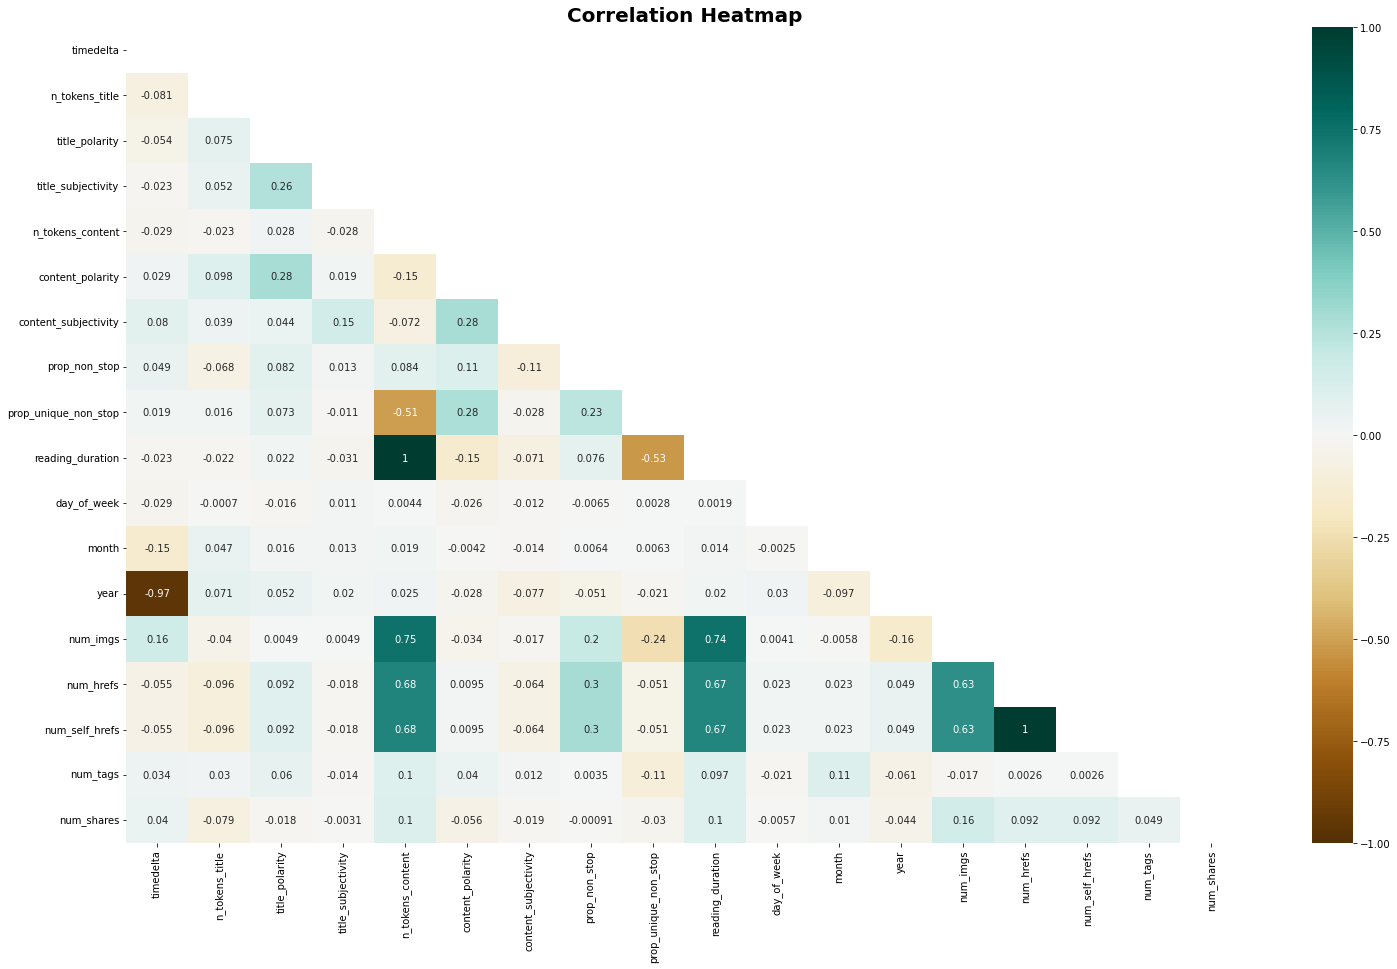

In [6]:
continuous_var = ['timedelta','n_tokens_title', 'title_polarity', 'title_subjectivity', 'n_tokens_content',  
    'content_polarity', 'content_subjectivity', 'prop_non_stop', 'prop_unique_non_stop', 'reading_duration', 'day_of_week', 'month', 'year',
    'num_imgs', 'num_hrefs', 'num_self_hrefs', 'num_tags', 'num_shares']
df_corr = df_full[continuous_var].corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='BrBG', mask=mask, annot=True)
heatmap.set_title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.show()

#### Number of words in content vs Number of shares

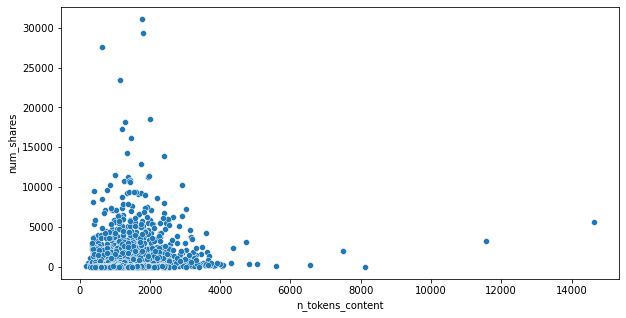

In [7]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='num_shares', x='n_tokens_content', data=df_full)

#### Number of words in title vs Number of shares

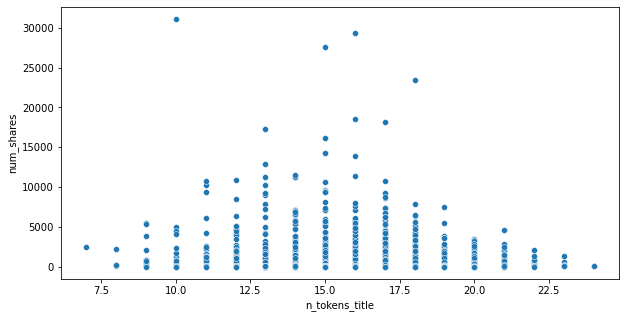

In [8]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='num_shares', x='n_tokens_title', data=df_full,palette='muted');

## Understand the distribution of our target variables Number of Shares

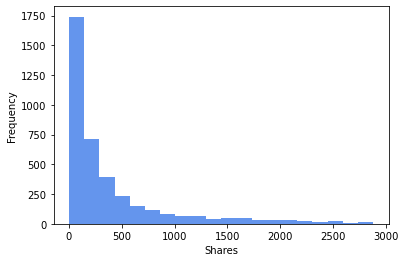

<AxesSubplot:xlabel='num_shares', ylabel='Density'>

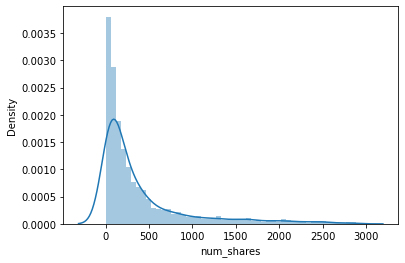

In [9]:
#drop outliers to plot distribution
pct999 =  df_full["num_shares"].quantile(.95)
                           
df_plot1 = df_full[df_full["num_shares"] < pct999]

plt.hist(df_plot1['num_shares'].tolist(), color='cornflowerblue', bins = 20)
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

# plt.subplot(1,2,2)
sns.distplot(df_plot1['num_shares'])

## Distribution for all the other variables

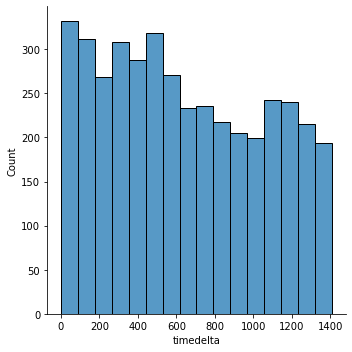

Skew for timedelta: 0.19162477668337918


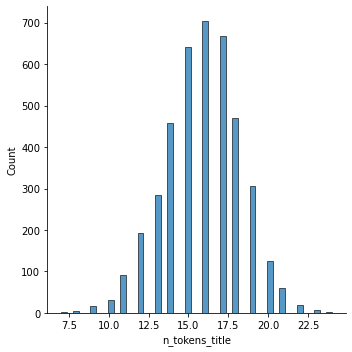

Skew for n_tokens_title: -0.1387701982683202


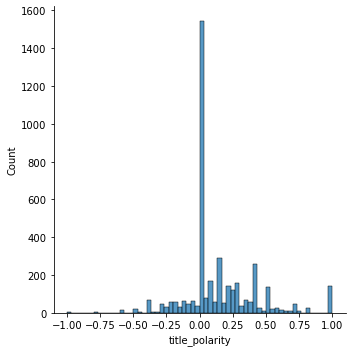

Skew for title_polarity: 0.8064041293669207


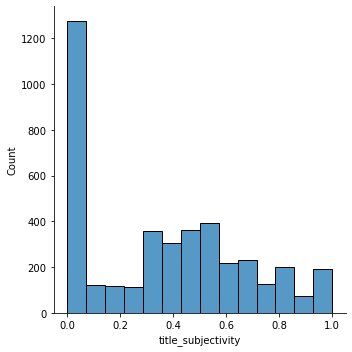

Skew for title_subjectivity: 0.3196111912249552


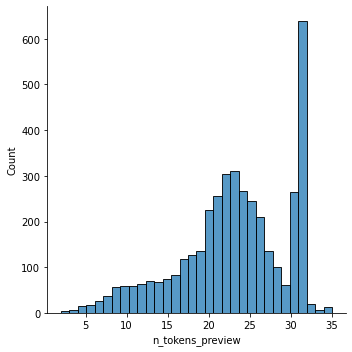

Skew for n_tokens_preview: -0.6064559175041051


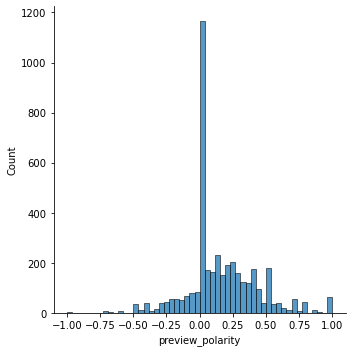

Skew for preview_polarity: 0.45162896955427945


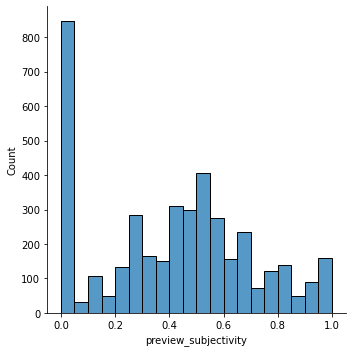

Skew for preview_subjectivity: 0.08464577537521055


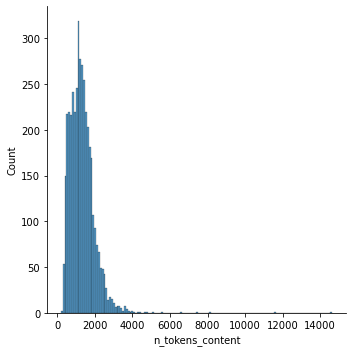

Skew for n_tokens_content: 3.880139210400362


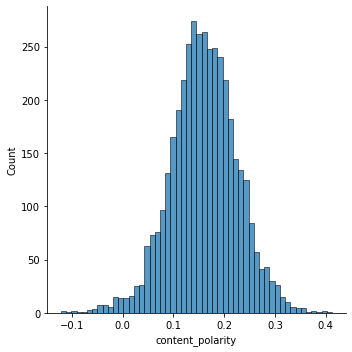

Skew for content_polarity: -0.13223109738610972


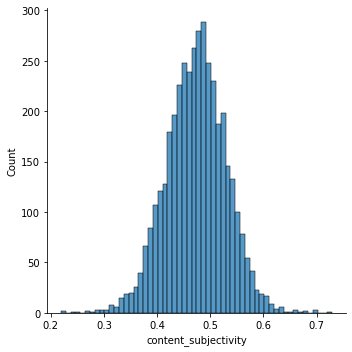

Skew for content_subjectivity: -0.07466394954504402


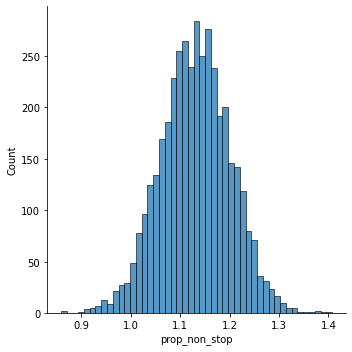

Skew for prop_non_stop: -0.031281869216566116


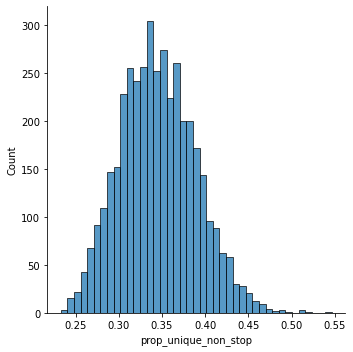

Skew for prop_unique_non_stop: 0.27773299743704766


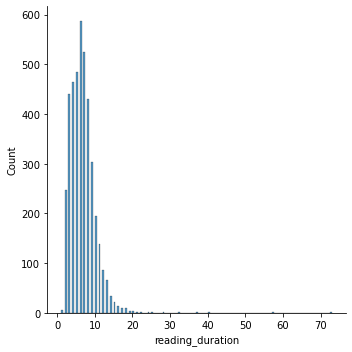

Skew for reading_duration: 3.7745430050588547


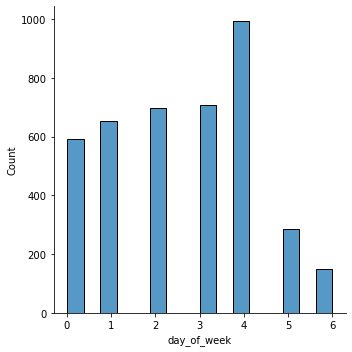

Skew for day_of_week: 0.02657427326893053


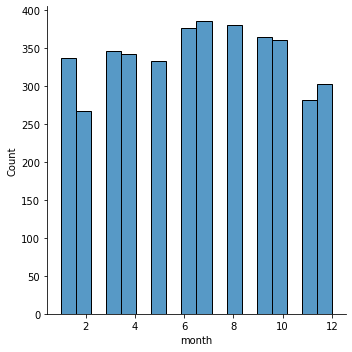

Skew for month: -0.035451183200372986


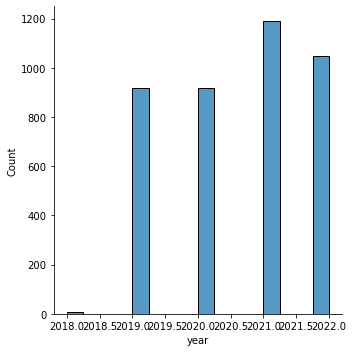

Skew for year: -0.14486381978933946


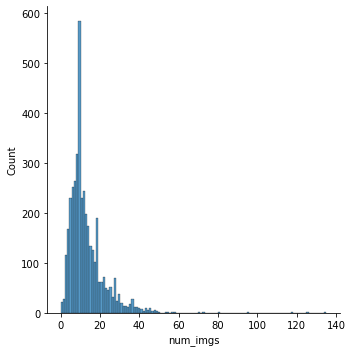

Skew for num_imgs: 3.1645797252375982


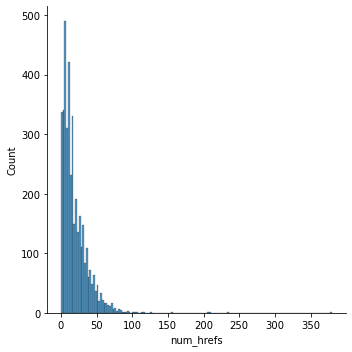

Skew for num_hrefs: 3.951626702374355


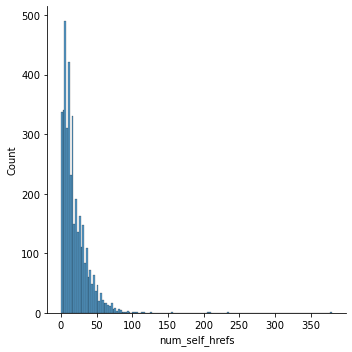

Skew for num_self_hrefs: 3.951626702374355


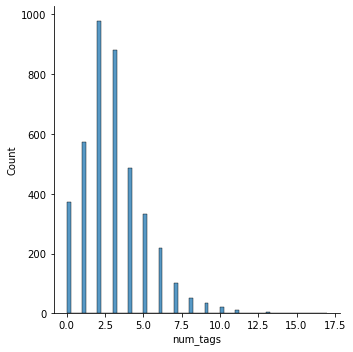

Skew for num_tags: 1.1255668499696827


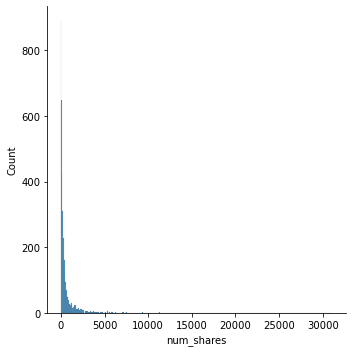

Skew for num_shares: 7.853568388549417


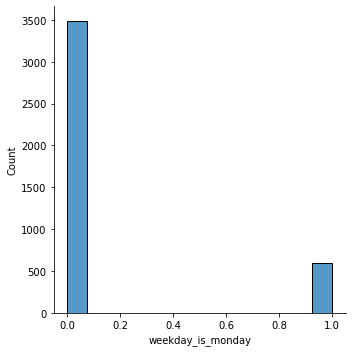

Skew for weekday_is_monday: 2.013283430061684


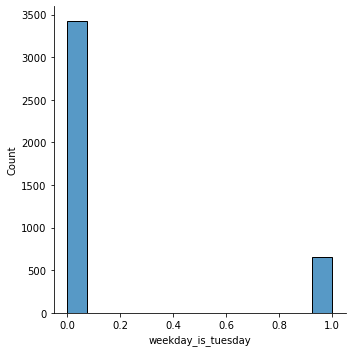

Skew for weekday_is_tuesday: 1.850071631812114


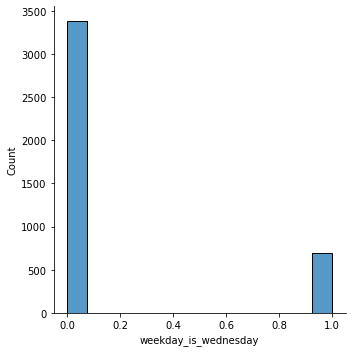

Skew for weekday_is_wednesday: 1.7475423583035246


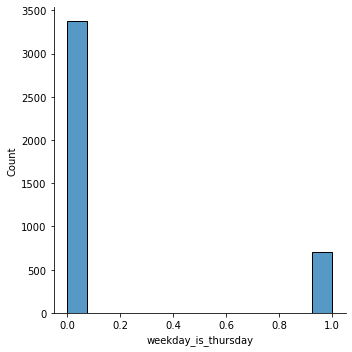

Skew for weekday_is_thursday: 1.7247792606870567


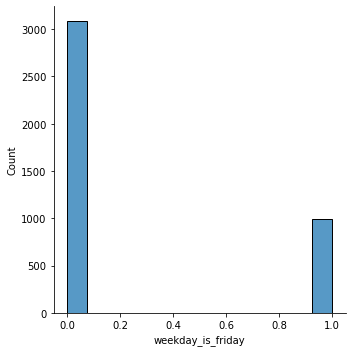

Skew for weekday_is_friday: 1.1948963648148914


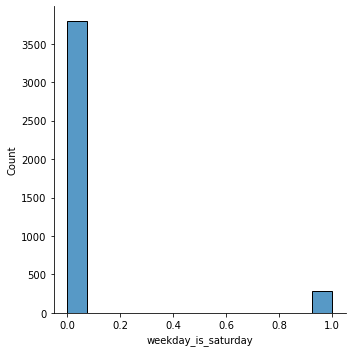

Skew for weekday_is_saturday: 3.3837007535539096


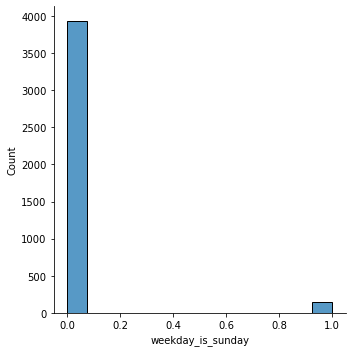

Skew for weekday_is_sunday: 4.96218816067257


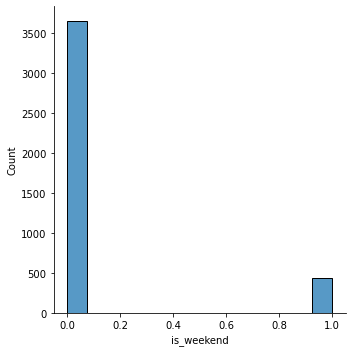

Skew for is_weekend: 2.562751312440478


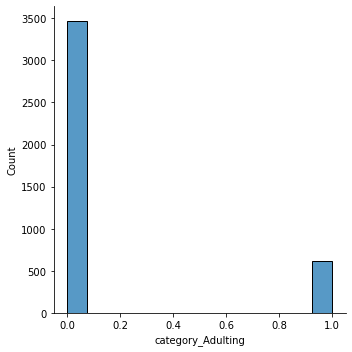

Skew for category_Adulting: 1.9611131887790045


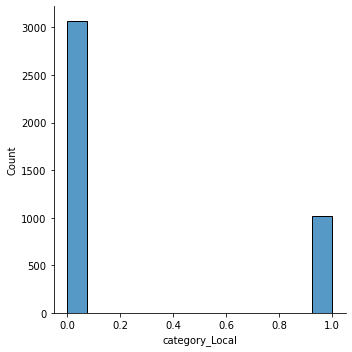

Skew for category_Local: 1.1657315251354874


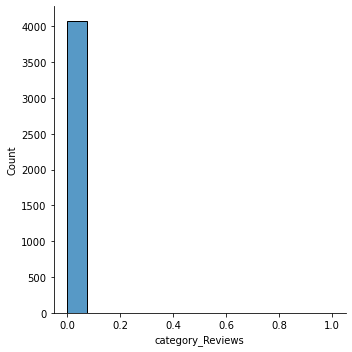

Skew for category_Reviews: 31.902182766198855


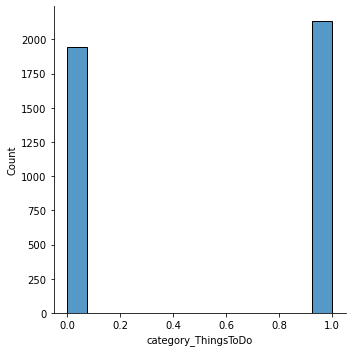

Skew for category_ThingsToDo: -0.09327270484773964


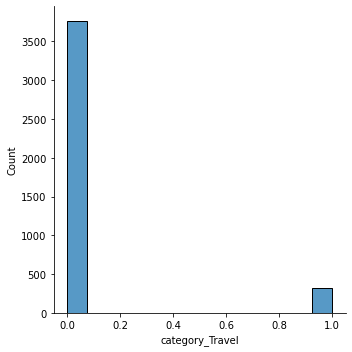

Skew for category_Travel: 3.162704534367035


In [10]:
dropped_cols = ['publish_date']
selected_cols = df_full.drop(columns=dropped_cols).select_dtypes(exclude="object").columns.tolist()

for col in selected_cols:
    sns.displot(data=df_full, x=col)
    plt.show()
    print(f"Skew for {col}:", df_full[col].skew())

#### After looking at the distribution of each feature, can we single out features which may contain outliers
#### For e.g, Understanding the distribution of categories, will consider removing Review since it has only 5 count

Text(0, 0.5, 'Count')

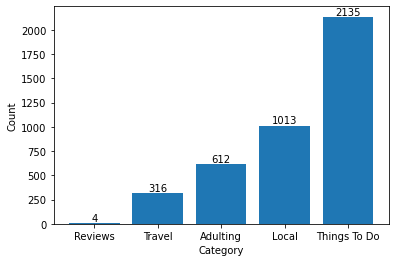

In [11]:
cat_count = df_full.groupby(['Category']).count()['url'].sort_values(ascending = True)
fig, ax = plt.subplots()
bars = ax.bar(cat_count.index, cat_count)
ax.bar_label(bars)
plt.xlabel('Category')
plt.ylabel('Count')

## Log transformation of Shares column due to the high skewness

In [12]:
df_full_log = df_full.copy()
df_full_log['num_shares_log'] = np.log(df_full_log['num_shares'].replace(0, np.nan)).replace(np.nan, 0)

df_full_log.skew()

timedelta                0.191625
n_tokens_title          -0.138770
title_polarity           0.806404
title_subjectivity       0.319611
n_tokens_preview        -0.606456
preview_polarity         0.451629
preview_subjectivity     0.084646
n_tokens_content         3.880139
content_polarity        -0.132231
content_subjectivity    -0.074664
prop_non_stop           -0.031282
prop_unique_non_stop     0.277733
reading_duration         3.774543
day_of_week              0.026574
month                   -0.035451
year                    -0.144864
num_imgs                 3.164580
num_hrefs                3.951627
num_self_hrefs           3.951627
num_tags                 1.125567
num_shares               7.853568
weekday_is_monday        2.013283
weekday_is_tuesday       1.850072
weekday_is_wednesday     1.747542
weekday_is_thursday      1.724779
weekday_is_friday        1.194896
weekday_is_saturday      3.383701
weekday_is_sunday        4.962188
is_weekend               2.562751
category_Adult

#### now num_shares_log is moderately skewed (between -0.5 & 0.5)

### Plotting Number of Shares against the Date of published to find any anomaly

Text(0.5, 0, 'Date')

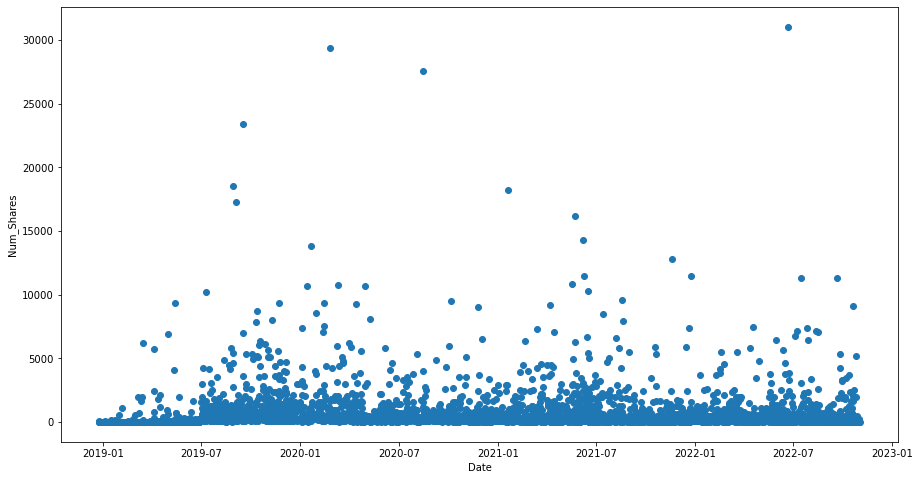

In [13]:
x_values = df_full_log['publish_date']
y_values = df_full_log['num_shares']

plt.subplots(figsize=(15,8))
dates = date2num(x_values)
plt.plot_date(dates, y_values)
plt.ylabel('Num_Shares')
plt.xlabel('Date')

#### Looking at the chart, we see a slight anomaly where the number of shares remain relatively low before 2019-07
#### Lets zoom into this time period to get a clearer view

Text(0.5, 0, 'Date')

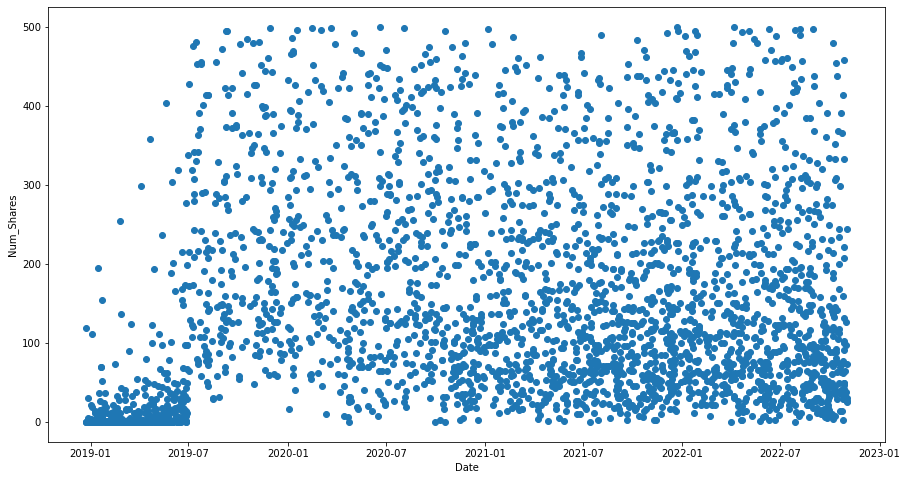

In [14]:
tempdata = df_full_log.loc[df_full_log["num_shares"] <= 500] #arbitrary number for now
x_values = tempdata['publish_date']
y_values = tempdata['num_shares']

plt.subplots(figsize=(15,8))
dates = date2num(x_values)
plt.plot_date(dates, y_values)
plt.ylabel('Num_Shares')
plt.xlabel('Date')

## Boxplot of current Number of shares

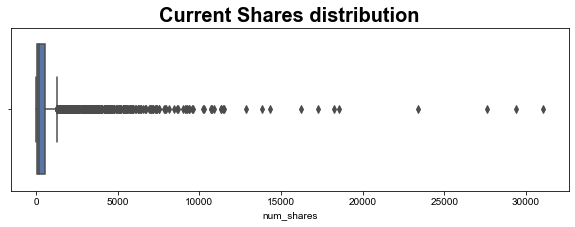

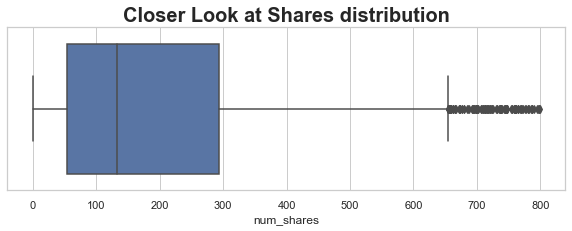

In [15]:
def plot_boxplot(df: pd.DataFrame, col: str, title: str) -> None:
    """Plot a boxplot from a dataframe column."""
    plt.figure(figsize=(10,3))
    plt.title(title, fontsize=20, fontweight='bold')
    sns.set_theme(style='whitegrid')
    sns.boxplot(x=df[col])
    plt.show()

plot_boxplot(df=df_full,
             col='num_shares',
             title='Current Shares distribution')

# Plot a clearer boxplot of shares distribution with num shares < 800
plot_boxplot(df=df_full.query("num_shares < 800"),
             col='num_shares',
             title='Closer Look at Shares distribution')

## Lets now look at the daily average number of shares over time

A slight seasonal pattern can be observe from this graph 

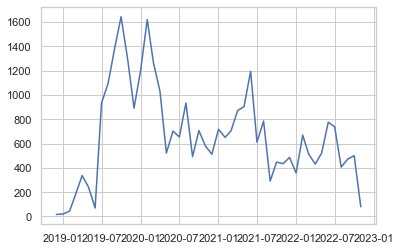

In [16]:
#Average Shares overtime

mean_shares = df_full[['publish_date' , 'num_shares']].copy()
mean_shares['publish_date'] = mean_shares['publish_date'].dt.strftime('%m/%Y')
mean_shares = mean_shares.groupby(['publish_date']).mean('num_shares').sort_values('publish_date', ascending = True)
mean_shares.index = pd.to_datetime(mean_shares.index)
mean_shares.sort_index(ascending = True, inplace = True)
plt.plot(mean_shares)

## Quick binning of Number of Shares to see how it correlates across the different days and months

Binning using the Mean as the cut off point shows a huge disparity between popular and unpopular articles. This is expected as our data is skewed towards unpopular articles. 

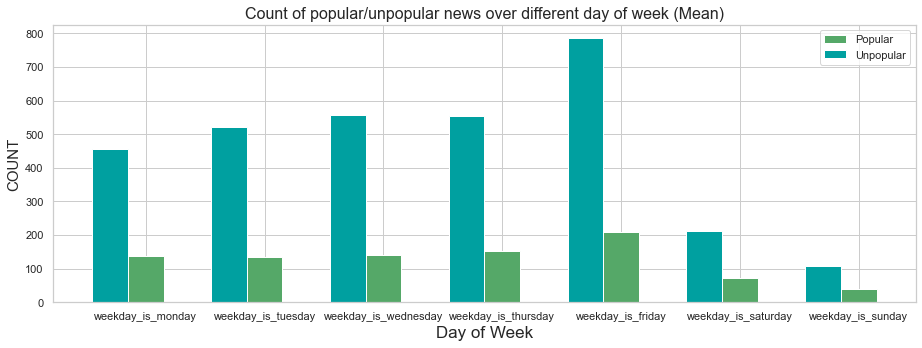

In [17]:
mean,median = df_full['num_shares'].mean(),df_full['num_shares'].median()
Wday = df_full.columns.values[37:44]

Unpop=df_full[df_full['num_shares']<mean]
Pop=df_full[df_full['num_shares']>=mean]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')


plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)


plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# weekend more popular

Binning using Median shows a more evenly distribution, allowing us to better analyse the relation between the days and the popularity of articles

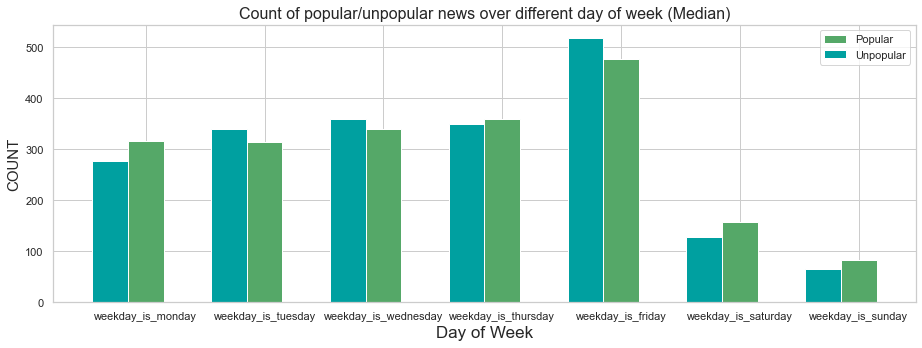

In [18]:
Unpop=df_full[df_full['num_shares']<median]
Pop=df_full[df_full['num_shares']>=median]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Using quantiles to split bin the number of shares and see the distribution across different quantiles

In [19]:
# creating a grading criteria for the shares
share_data = df_full_log['num_shares']
df_full_log['num_shares'].describe()

count     4080.000000
mean       678.575000
std       1644.197577
min          0.000000
25%         70.750000
50%        197.000000
75%        554.250000
max      31063.000000
Name: num_shares, dtype: float64

### We remove the top 10 percentile of the number of shares and plot a scattor plot against all the continuous variables against the Number of shares to find any correlaion.

Not much linear correlation can be found

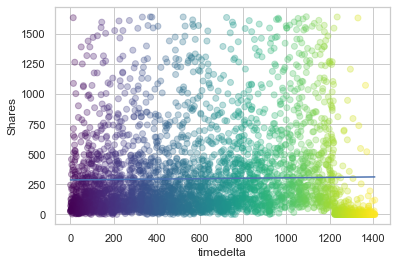

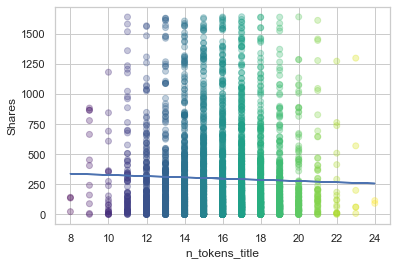

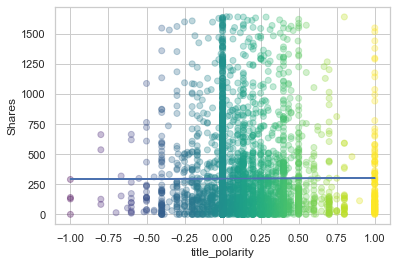

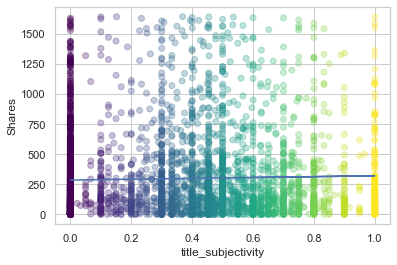

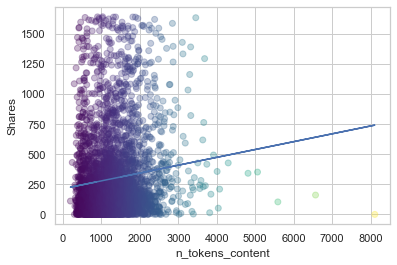

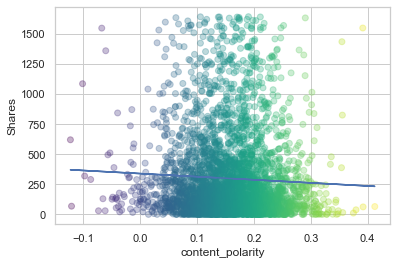

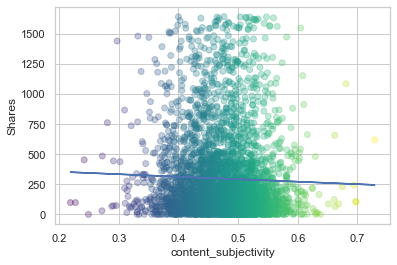

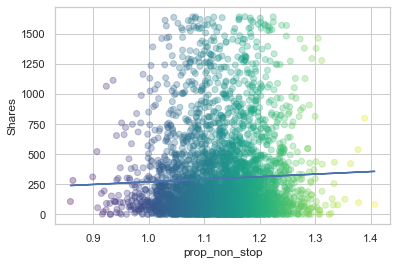

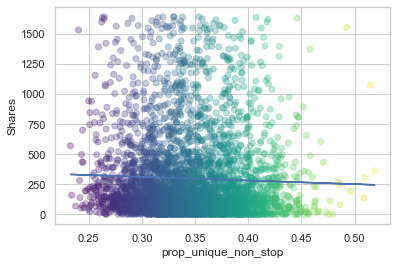

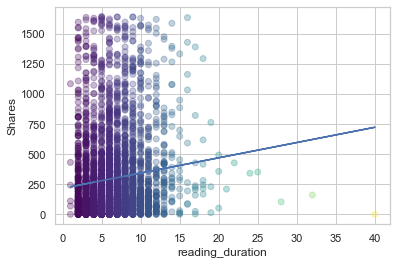

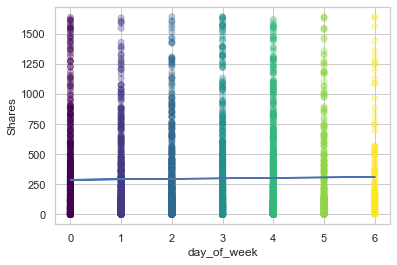

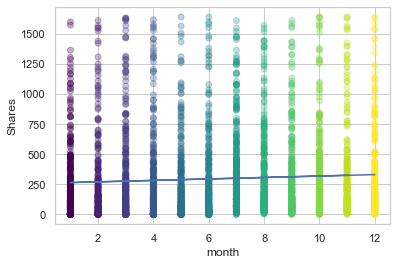

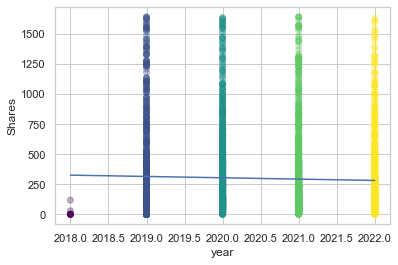

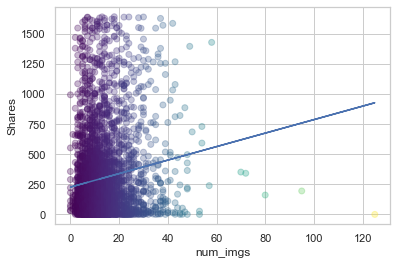

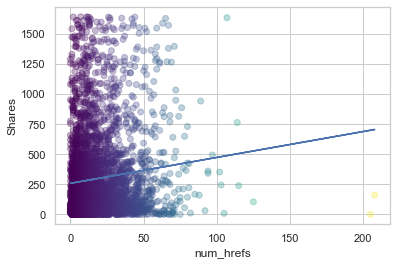

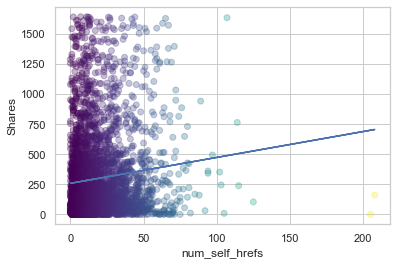

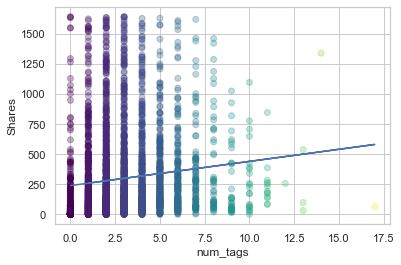

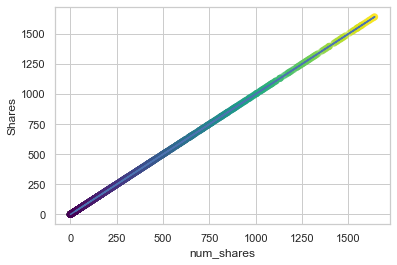

In [20]:
pct90 =  df_full["num_shares"].quantile(.9)
df_filtered = df_full.loc[(df_full['num_shares'] < pct90)]
for v in continuous_var:
    x = df_filtered[v]
    y = df_filtered['num_shares']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x))
    plt.scatter(x,y, c=x, alpha=0.3,
                cmap='viridis')
    plt.xlabel(v)
    plt.ylabel("Shares")
    plt.show()



### Lets now look at the distribution of each category across the different number of shares percentiles using boxplots

In [21]:
# create label grades for the classes
share_label = list()
for share in share_data:
    if share == 0:
        share_label.append('No Shares')
    elif share <= df_full_log.num_shares.quantile(0.25):
        share_label.append('Low Shares')
    elif share <= df_full_log.num_shares.quantile(0.50):
        share_label.append('Average Shares')
    else:
        share_label.append('High Shares')

# Update this class label into a new dataframe for more EDA
df_full2 = pd.concat([df_full_log, pd.DataFrame(share_label, columns=['popularity_scale'])], axis=1)
df_full2

url  timedelta  \
0     https://thesmartlocal.com/read/staytion-marsil...          0   
1     https://thesmartlocal.com/read/things-to-do-es...          1   
2     https://thesmartlocal.com/read/things-to-do-no...          1   
3     https://thesmartlocal.com/read/paypal-welcome-...          1   
4     https://thesmartlocal.com/read/things-to-do-ju...          1   
...                                                 ...        ...   
4075     https://thesmartlocal.com/read/deals-end-2018/       1407   
4076  https://thesmartlocal.com/read/inspiration-sto...       1409   
4077         https://thesmartlocal.com/read/nascans-sg/       1409   
4078  https://thesmartlocal.com/read/family-spots-no...       1409   
4079     https://thesmartlocal.com/read/bioskin-3-in-1/       1409   

                                                  title  \
0     Staytion Marsiling: Coworking Space In The Nor...   
1     Esplanade Is Having Free Shows, A Theatre BTS ...   
2     17 New Things To Do In November 2022 – Bishan ...   
3     You Can Redeem Vouchers For Brands Like foodpa...   
4     9 Best Things To Do In Jurong For Westies To S...   
...                                                 ...   
4075  9 Money-Saving Hacks That Will Expire On 31 De...   
4076  Inspiration Store At Orchard Xchange Teaches Y...   
4077  NASCANS Has Ex-MOE Teachers And Coaches Maths ...   
4078  6 Hidden Family Spots In The North To Get Your...   
4079  Bioskin’s 3-in-1 Korean Hair Colour, Facial & ...   

                   subcategory1 subcategory2 subcategory3  \
0                        Career          NaN          NaN   
1     Things To Do In Singapore          NaN          NaN   
2                    Activities          NaN          NaN   
3                    Businesses          NaN          NaN   
4     Things To Do In Singapore          NaN          NaN   
...                         ...          ...          ...   
4075  Things To Do In Singapore          NaN          NaN   
4076                     Events          NaN          NaN   
4077                 Businesses          NaN          NaN   
4078  Things To Do In Singapore          NaN          NaN   
4079          Beauty & Wellness          NaN          NaN   

                                                preview  \
0     Hooray for being able to sleep in, plus the ti...   
1              Do not miss the free entertainment here.   
2     In the blink of an eye, we're approaching 2023...   
3        Vouchers can also be used on Zalora and Agoda.   
4                       Hot take: west side, best side.   
...                                                 ...   
4075  Deals and hacks before 2019    You know the en...   
4076  JR East Inspiration Store   Here’s a thought –...   
4077  NASCANS Student Care Centre   If you’ve racked...   
4078  Family places and activities in Singapore’s No...   
4079  3-in-1 hair, facial & scalp treatment    In an...   

                                                content  n_tokens_title  \
0     Staytion Marsiling – Coworking space in the No...              15   
1     Things to do at Esplanade So you’ve been to Es...              17   
2     Things to do in November 2022 Halloween may be...              19   
3     PayPal’s Welcome Pack promotion With Black Fri...              16   
4     Things to do in Jurong For too long, residents...              20   
...                                                 ...             ...   
4075  Deals and hacks before 2019 You know the end-o...              17   
4076  JR East Inspiration Store Here’s a thought – m...              15   
4077  NASCANS Student Care Centre If you’ve racked y...              15   
4078  Family places and activities in Singapore’s No...              14   
4079  3-in-1 hair, facial & scalp treatment In an id...              16   

      title_polarity  ...  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0           0.200000  ...                    0                  0           0 

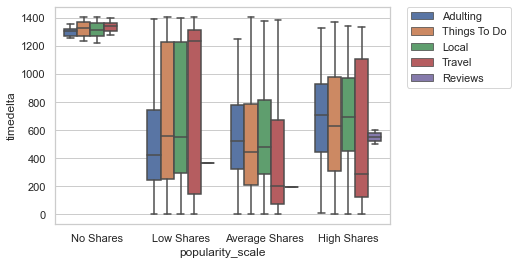

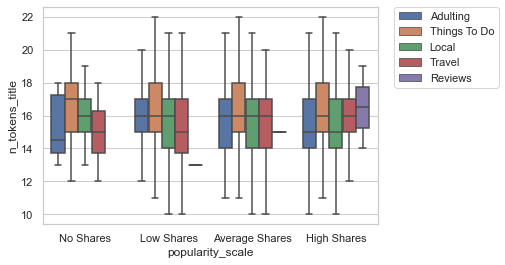

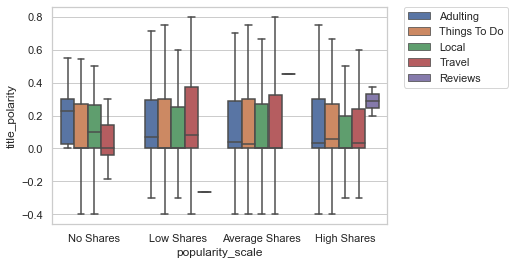

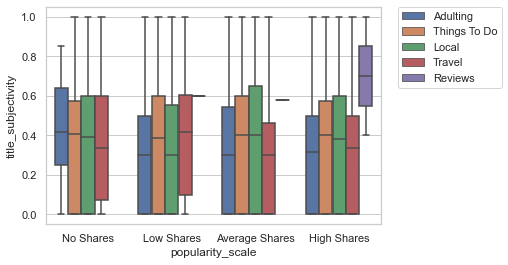

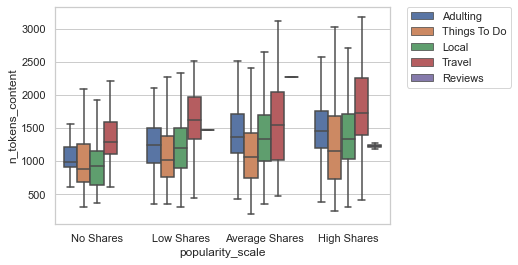

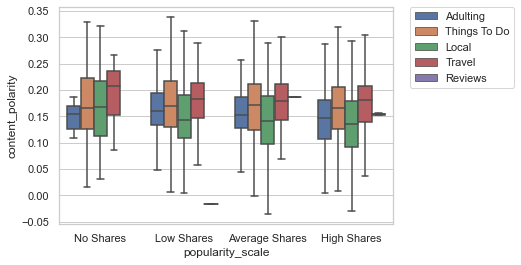

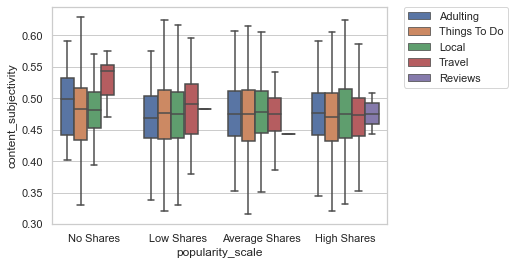

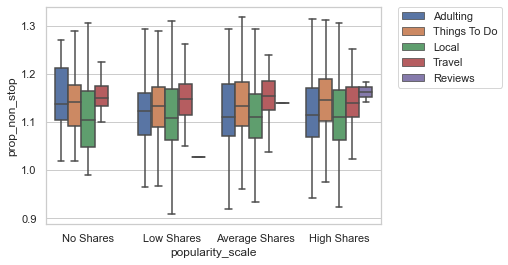

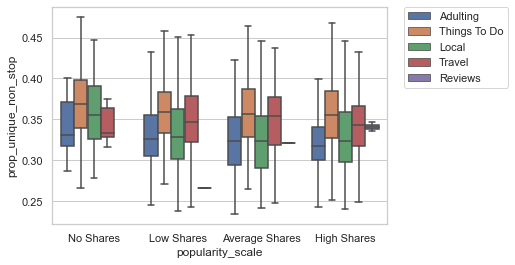

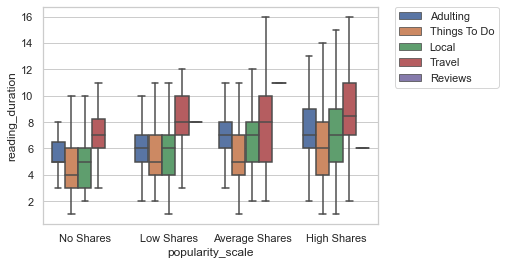

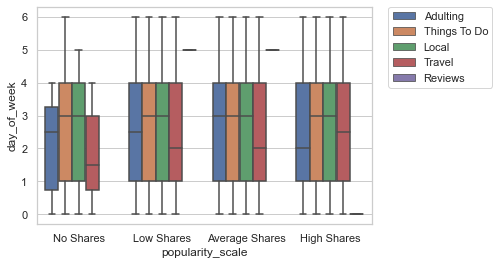

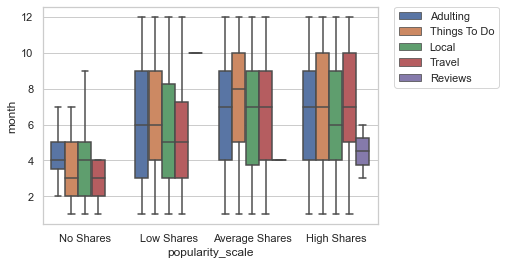

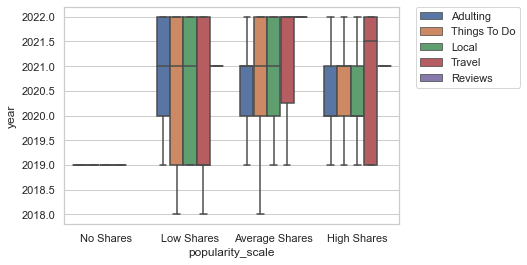

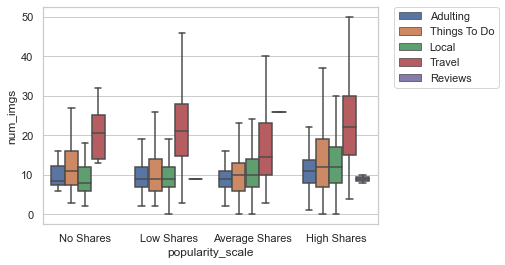

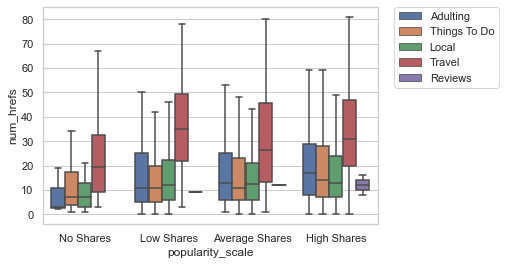

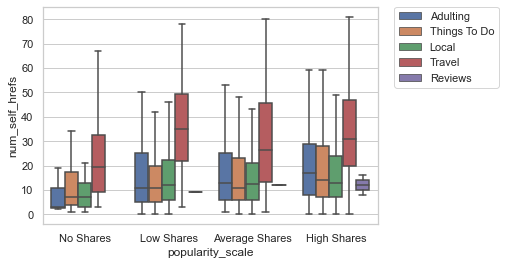

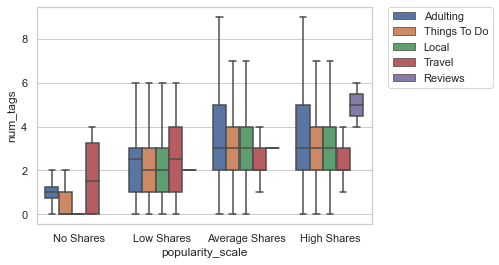

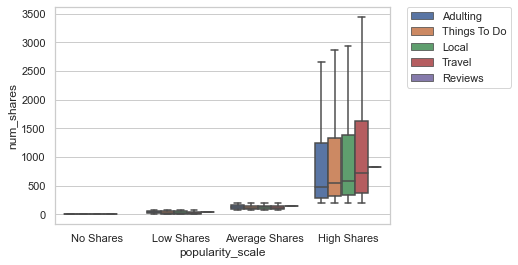

In [22]:

# fig,ax = plt.subplots(figsize=(10,8))
for v in continuous_var:
    sns.boxplot(data= df_full2, x='popularity_scale',y=v, hue='Category', 
                order=['No Shares', 'Low Shares', 'Average Shares', 'High Shares'], showfliers=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

### 3D scatter plot to check for any clusters between the number of shares, title polarity, and title subjectivity

/var/folders/6x/s75_0kl90jz1m6_242dw_jlc0000gn/T/ipykernel_9281/3563966989.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


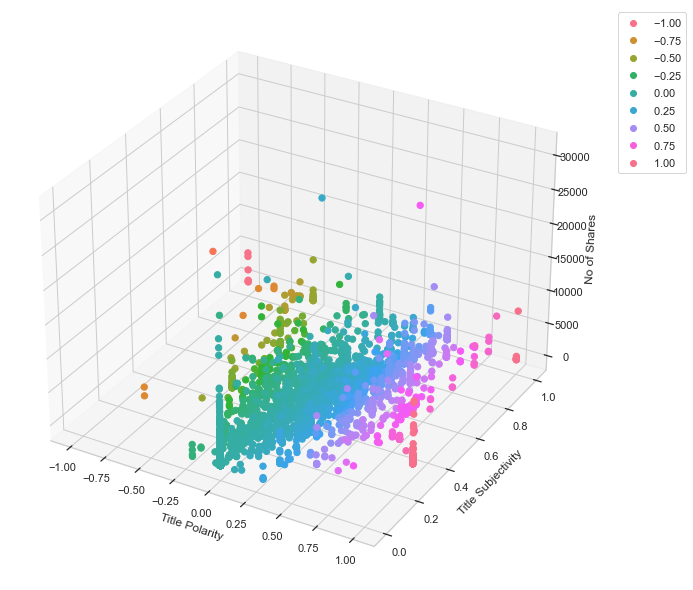

In [23]:
x = df_full2['title_polarity']
y = df_full2['title_subjectivity']
z = df_full2['num_shares']

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Title Polarity')
ax.set_ylabel('Title Subjectivity')
ax.set_zlabel('No of Shares')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

## Comparing top 25 VS bot 25 percentile

Determining the features which we would like to compare. Some features such as 'URL' are not comparable.

In [24]:
comparing_features = ['n_tokens_title', 'title_polarity', 'title_subjectivity', 'n_tokens_content', 'prop_non_stop', 'prop_unique_non_stop',
                  'content_polarity', 'content_subjectivity', 'reading_duration', 'day_of_week', 'month', 'num_imgs', 'num_hrefs', 
                    'num_self_hrefs', 'num_tags', 'num_shares']
df_compare = df_full[comparing_features].copy()

In [25]:
df_compare

n_tokens_title  title_polarity  title_subjectivity  n_tokens_content  \
0                 15        0.200000            0.587500               871   
1                 17        0.400000            0.800000               596   
2                 19        0.136364            0.454545              2677   
3                 16        0.400000            0.800000               568   
4                 20        1.000000            0.300000              2008   
...              ...             ...                 ...               ...   
4075              17        0.000000            0.000000               866   
4076              15        0.000000            0.300000               600   
4077              15        0.000000            0.000000              1393   
4078              14       -0.166667            0.333333               948   
4079              16        0.000000            0.000000              1506   

      prop_non_stop  prop_unique_non_stop  content_polarity  \
0          1.067738              0.358396          0.163592   
1          1.006711              0.362500          0.212424   
2          1.151662              0.314058          0.175874   
3          1.153169              0.392593          0.305345   
4          1.160857              0.308376          0.153347   
...             ...                   ...               ...   
4075       1.084296              0.372881          0.100514   
4076       1.103333              0.387900          0.254636   
4077       1.247667              0.333333          0.189242   
4078       1.169831              0.348178          0.225693   
4079       1.138778              0.320405          0.134052   

      content_subjectivity  reading_duration  day_of_week  month  num_imgs  \
0                 0.547201                 4            2     11         7   
1                 0.524781                 3            1     11         5   
2                 0.470114                13            1     11        33   
3                 0.488650                 3            1     11         5   
4                 0.395587                10            1     11        24   
...                    ...               ...          ...    ...       ...   
4075              0.364863                 4            2     12        14   
4076              0.515690                 3            0     12        10   
4077              0.436573                 7            0     12        12   
4078              0.561916                 5            0     12        24   
4079              0.429649                 8            0     12        12   

      num_hrefs  num_self_hrefs  num_tags  num_shares  
0            17              17         1          27  
1             7               7         2          73  
2            63              63         6         244  
3             4               4         2          25  
4            18              18         3          31  
...         ...             ...       ...         ...  
4075         17              17         0           0  
4076          3               3         0           0  
4077          6               6         0           0  
4078          7               7         0         119  
4079          9               9         0           0  

[4080 rows x 16 columns]

Splitting the Dataframe into the Top 25 and Bottom 25th Percentile based on the Number of Shares

In [26]:
df_top25 = df_compare[df_compare['num_shares'] >= df_compare['num_shares'].quantile(0.75)].copy()
df_top25.drop(columns = 'num_shares', inplace = True)

df_bot25 = df_compare[df_compare['num_shares'] <= df_compare['num_shares'].quantile(0.25)].copy()
df_bot25.drop(columns = 'num_shares', inplace = True)

Plotting Histogram for each comparable variables to see the distribution for Top 25th and Bottom 25th Percentile. 

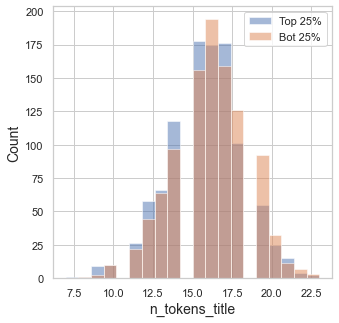

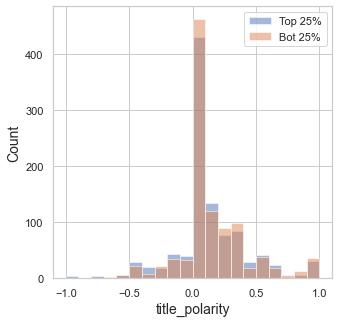

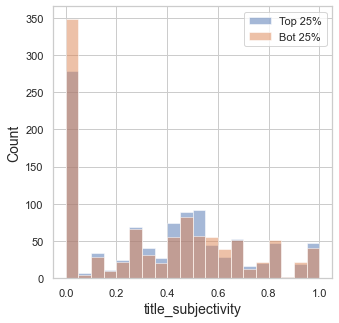

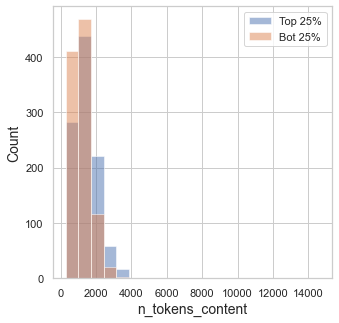

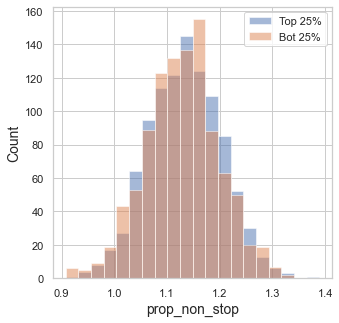

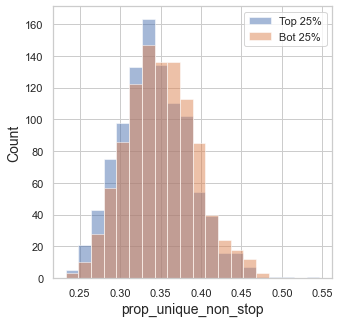

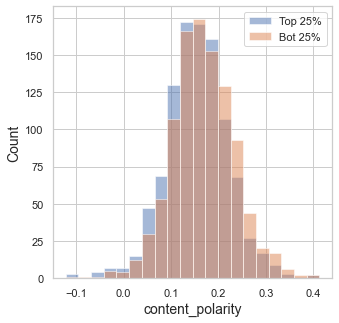

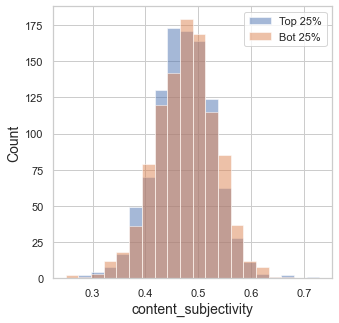

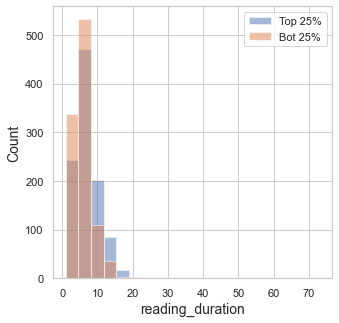

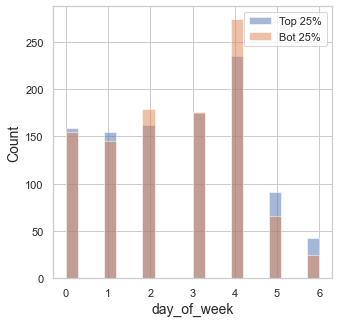

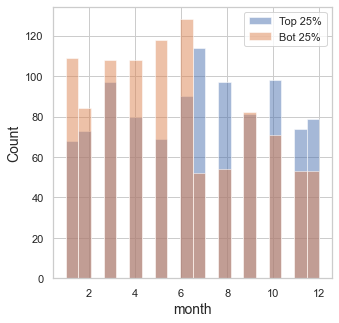

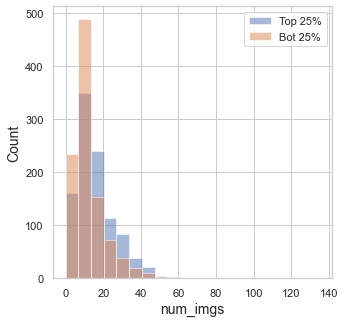

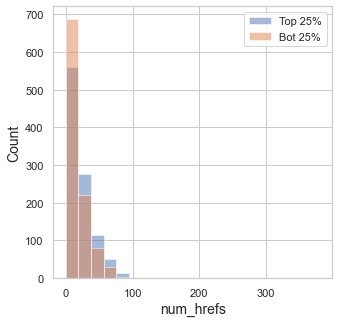

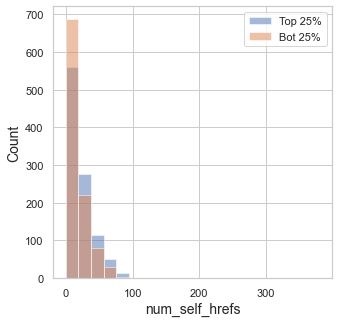

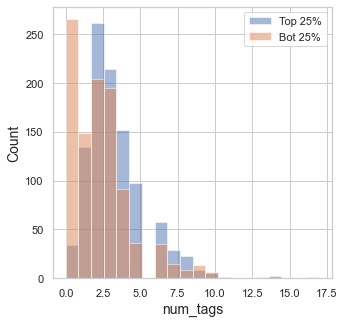

In [27]:
for i in range(df_top25.shape[1]):
    plt.figure(figsize=(5,5))
    bins=np.histogram(np.hstack((df_bot25.iloc[:,i],df_top25.iloc[:,i])), bins=20)[1] #get the bin edges
    plt.hist(df_top25.iloc[:,i], bins, alpha=0.5, label="Top 25%")
    plt.hist(df_bot25.iloc[:,i], bins, alpha=0.5, label="Bot 25%")
    plt.xlabel(df_top25.columns[i], size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')

# Kmeans clustering

##### To explore our data further, we have decided to explore any potential clusters using Kmeans

In [28]:
df_full_log.isna().sum()

url                        0
timedelta                  0
title                      0
subcategory1               0
subcategory2            3967
subcategory3            4079
preview                    0
content                    0
n_tokens_title             0
title_polarity             0
title_subjectivity         0
n_tokens_preview           0
preview_polarity           0
preview_subjectivity       0
n_tokens_content           0
content_polarity           0
content_subjectivity       0
prop_non_stop              0
prop_unique_non_stop       0
reading_duration           0
author                     0
publish_date               0
day_of_week                0
month                      0
year                       0
num_imgs                   0
img_links                  0
num_hrefs                  0
num_self_hrefs             0
num_tags                   0
num_shares                 0
img_dark                   0
img_light                  0
img_saturation             0
top3_colours  

##### Drop unrelated columns

In [29]:
df_kmeans = df_full_log.drop(['subcategory2', 'subcategory3', 'url', 'title', 'preview', 
                              'content', 'img_dark', 'img_light', 'img_saturation', 'top3_colours',
                             'bot3_colours', 'img_links'], axis = 1).copy()

##### To remove unccessary noises, we have to remove outliers before conduction any clustering methods. In this case, we will be dropping articles written by authors who have only written 1 article

In [30]:

low_author_count = df_full_log.groupby(['author'])['author'].count().sort_values(ascending = False)
low_author_count = low_author_count[low_author_count == 1].index.tolist()
df_kmeans = df_kmeans[~df_kmeans['author'].isin(low_author_count)]


##### We will also be removing 'Reviews' Category since it has only 5 count (outliers)

In [31]:
print(df_kmeans.groupby('Category')['Category'].count().sort_values(ascending = False))
df_kmeans = df_kmeans[df_kmeans['Category'] != 'Reviews']

Category
Things To Do    2121
Local           1002
Adulting         602
Travel           307
Reviews            4
Name: Category, dtype: int64


##### Sine and Cosine Tranformation to encode cyclical features for rentention of proximity measures and prevent curse of dimensionality through one hot encoding

In [32]:
def transformation(df, columns):
    df_kmeans = df.copy()
    for col in columns:
        s = df[col]
        max_value = s.max()
        sin_values = [math.sin((2 * math.pi * x)/max_value) for x in list(s)]
        cos_values = [math.cos((2 * math.pi * x)/max_value) for x in list(s)]
        df_kmeans[col + "_sin"], df_kmeans[col + "_cos"] = sin_values, cos_values
    return df_kmeans

time_cols = ["day_of_week", "month"]
df_kmeans = transformation(df_kmeans, time_cols)

df_kmeans.head(3)



timedelta               subcategory1  n_tokens_title  title_polarity  \
0          0                     Career              15        0.200000   
1          1  Things To Do In Singapore              17        0.400000   
2          1                 Activities              19        0.136364   

   title_subjectivity  n_tokens_preview  preview_polarity  \
0            0.587500                26              0.50   
1            0.800000                 7              0.40   
2            0.454545                26              0.15   

   preview_subjectivity  n_tokens_content  content_polarity  ...  \
0                 0.625               871          0.163592  ...   
1                 0.800               596          0.212424  ...   
2                 0.100              2677          0.175874  ...   

   category_Adulting  category_Local  category_Reviews  category_ThingsToDo  \
0                  1               0                 0                    0   
1                  0               0                 0                    1   
2                  0               0                 0                    1   

  category_Travel num_shares_log  day_of_week_sin  day_of_week_cos  month_sin  \
0               0       3.295837         0.866025             -0.5       -0.5   
1               0       4.290459         0.866025              0.5       -0.5   
2               0       5.497168         0.866025              0.5       -0.5   

   month_cos  
0   0.866025  
1   0.866025  
2   0.866025  

[3 rows x 43 columns]

###### Dropping columns which was did Sine and Cosine Transformation

In [33]:
df_kmeans.drop(['day_of_week', 'month', 'year', 'publish_date', 'weekday_is_monday', 
                'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday'
               , 'weekday_is_saturday', 'weekday_is_sunday'], axis = 1, inplace = True)

##### Count Encoding on variables with high cardinality (to prevent curse of dimentionality)

In [34]:
def count_encoder(df, columns):
    df_new = df.copy()
    for c in columns:
        df_new[c + '_encoded'] = df_new[c].astype('object').map(df[c].value_counts())
        df_new[c + '_encoded_normalize'] = df_new[c + '_encoded'] / max(df_new[c + '_encoded'])
        df_new.drop([c + '_encoded'], axis = 1, inplace = True)
    return df_new

count_encoder_cols = ['author','subcategory1']
df_kmeans = count_encoder(df_kmeans, count_encoder_cols)
df_kmeans.drop(count_encoder_cols, axis = 1, inplace = True)
df_kmeans.drop(['Category'], axis = 1, inplace = True)
df_kmeans.head(2)

timedelta  n_tokens_title  title_polarity  title_subjectivity  \
0          0              15             0.2              0.5875   
1          1              17             0.4              0.8000   

   n_tokens_preview  preview_polarity  preview_subjectivity  n_tokens_content  \
0                26               0.5                 0.625               871   
1                 7               0.4                 0.800               596   

   content_polarity  content_subjectivity  ...  category_Reviews  \
0          0.163592              0.547201  ...                 0   
1          0.212424              0.524781  ...                 0   

   category_ThingsToDo  category_Travel  num_shares_log  day_of_week_sin  \
0                    0                0        3.295837         0.866025   
1                    1                0        4.290459         0.866025   

   day_of_week_cos  month_sin  month_cos  author_encoded_normalize  \
0             -0.5       -0.5   0.866025                  0.732334   
1              0.5       -0.5   0.866025                  0.211991   

   subcategory1_encoded_normalize  
0                        0.146982  
1                        0.133858  

[2 rows x 31 columns]

##### Remove Outliers for continuous variablies (if value is more than 3 Standard Deviation away from mean)

In [35]:

df_kmeans_final = df_kmeans.copy()
for col in df_kmeans:
    if col in continuous_var:
        mean = df_kmeans[col].mean()
        std = df_kmeans[col].std()
        df_kmeans_final = df_kmeans_final[((df_kmeans_final[col] <= mean + (3 * std)) & (df_kmeans_final[col] >= mean - (3 * std)))]

In [36]:
pd.set_option('display.max_columns', 500)
df_kmeans_final

timedelta  n_tokens_title  title_polarity  title_subjectivity  \
0             0              15        0.200000            0.587500   
1             1              17        0.400000            0.800000   
2             1              19        0.136364            0.454545   
3             1              16        0.400000            0.800000   
5             2              15       -0.050000            0.400000   
...         ...             ...             ...                 ...   
4075       1407              17        0.000000            0.000000   
4076       1409              15        0.000000            0.300000   
4077       1409              15        0.000000            0.000000   
4078       1409              14       -0.166667            0.333333   
4079       1409              16        0.000000            0.000000   

      n_tokens_preview  preview_polarity  preview_subjectivity  \
0                   26          0.500000              0.625000   
1                    7          0.400000              0.800000   
2                   26          0.150000              0.100000   
3                    9          0.000000              0.000000   
5                    7          0.000000              0.375000   
...                ...               ...                   ...   
4075                30          0.136364              0.454545   
4076                30          0.095833              0.529167   
4077                30          0.000000              0.000000   
4078                30         -0.275000              0.375000   
4079                30          0.377778              0.483333   

      n_tokens_content  content_polarity  content_subjectivity  prop_non_stop  \
0                  871          0.163592              0.547201       1.067738   
1                  596          0.212424              0.524781       1.006711   
2                 2677          0.175874              0.470114       1.151662   
3                  568          0.305345              0.488650       1.153169   
5                 2058          0.182297              0.452908       1.130224   
...                ...               ...                   ...            ...   
4075               866          0.100514              0.364863       1.084296   
4076               600          0.254636              0.515690       1.103333   
4077              1393          0.189242              0.436573       1.247667   
4078               948          0.225693              0.561916       1.169831   
4079              1506          0.134052              0.429649       1.138778   

      prop_unique_non_stop  reading_duration  num_imgs  num_hrefs  \
0                 0.358396                 4         7         17   
1                 0.362500                 3         5          7   
2                 0.314058                13        33         63   
3                 0.392593                 3         5          4   
5                 0.384615                10        27         64   
...                    ...               ...       ...        ...   
4075              0.372881                 4        14         17   
4076              0.387900                 3        10          3   
4077              0.333333                 7        12          6   
4078              0.348178                 5        24          7   
4079              0.320405                 8        12          9   

      num_self_hrefs  num_tags  num_shares  is_weekend  category_Adulting  \
0                 17         1          27           0                  1   
1                  7         2          73           0                  0   
2                 63         6         244           0                  0   
3                  4         2          25           0                  0   
5                 64         3          38           0                  0   
...              ...       ...         ...         ...                ...   
4075              1

##### Convert all datatype to float for kmeans and remove those number of shares that are = 0

In [37]:
df_kmeans_final

timedelta  n_tokens_title  title_polarity  title_subjectivity  \
0             0              15        0.200000            0.587500   
1             1              17        0.400000            0.800000   
2             1              19        0.136364            0.454545   
3             1              16        0.400000            0.800000   
5             2              15       -0.050000            0.400000   
...         ...             ...             ...                 ...   
4075       1407              17        0.000000            0.000000   
4076       1409              15        0.000000            0.300000   
4077       1409              15        0.000000            0.000000   
4078       1409              14       -0.166667            0.333333   
4079       1409              16        0.000000            0.000000   

      n_tokens_preview  preview_polarity  preview_subjectivity  \
0                   26          0.500000              0.625000   
1                    7          0.400000              0.800000   
2                   26          0.150000              0.100000   
3                    9          0.000000              0.000000   
5                    7          0.000000              0.375000   
...                ...               ...                   ...   
4075                30          0.136364              0.454545   
4076                30          0.095833              0.529167   
4077                30          0.000000              0.000000   
4078                30         -0.275000              0.375000   
4079                30          0.377778              0.483333   

      n_tokens_content  content_polarity  content_subjectivity  prop_non_stop  \
0                  871          0.163592              0.547201       1.067738   
1                  596          0.212424              0.524781       1.006711   
2                 2677          0.175874              0.470114       1.151662   
3                  568          0.305345              0.488650       1.153169   
5                 2058          0.182297              0.452908       1.130224   
...                ...               ...                   ...            ...   
4075               866          0.100514              0.364863       1.084296   
4076               600          0.254636              0.515690       1.103333   
4077              1393          0.189242              0.436573       1.247667   
4078               948          0.225693              0.561916       1.169831   
4079              1506          0.134052              0.429649       1.138778   

      prop_unique_non_stop  reading_duration  num_imgs  num_hrefs  \
0                 0.358396                 4         7         17   
1                 0.362500                 3         5          7   
2                 0.314058                13        33         63   
3                 0.392593                 3         5          4   
5                 0.384615                10        27         64   
...                    ...               ...       ...        ...   
4075              0.372881                 4        14         17   
4076              0.387900                 3        10          3   
4077              0.333333                 7        12          6   
4078              0.348178                 5        24          7   
4079              0.320405                 8        12          9   

      num_self_hrefs  num_tags  num_shares  is_weekend  category_Adulting  \
0                 17         1          27           0                  1   
1                  7         2          73           0                  0   
2                 63         6         244           0                  0   
3                  4         2          25           0                  0   
5                 64         3          38           0                  0   
...              ...       ...         ...         ...                ...   
4075              1

In [38]:
for x in df_kmeans_final:
    df_kmeans_final = df_kmeans_final.astype({x:'float'}) 

##### Start running Kmeans Model. Starting off with the elbow method to determine the number of Clusters

In [39]:
pd.set_option('display.max_columns', 500)
df_kmeans_final

timedelta  n_tokens_title  title_polarity  title_subjectivity  \
0           0.0            15.0        0.200000            0.587500   
1           1.0            17.0        0.400000            0.800000   
2           1.0            19.0        0.136364            0.454545   
3           1.0            16.0        0.400000            0.800000   
5           2.0            15.0       -0.050000            0.400000   
...         ...             ...             ...                 ...   
4075     1407.0            17.0        0.000000            0.000000   
4076     1409.0            15.0        0.000000            0.300000   
4077     1409.0            15.0        0.000000            0.000000   
4078     1409.0            14.0       -0.166667            0.333333   
4079     1409.0            16.0        0.000000            0.000000   

      n_tokens_preview  preview_polarity  preview_subjectivity  \
0                 26.0          0.500000              0.625000   
1                  7.0          0.400000              0.800000   
2                 26.0          0.150000              0.100000   
3                  9.0          0.000000              0.000000   
5                  7.0          0.000000              0.375000   
...                ...               ...                   ...   
4075              30.0          0.136364              0.454545   
4076              30.0          0.095833              0.529167   
4077              30.0          0.000000              0.000000   
4078              30.0         -0.275000              0.375000   
4079              30.0          0.377778              0.483333   

      n_tokens_content  content_polarity  content_subjectivity  prop_non_stop  \
0                871.0          0.163592              0.547201       1.067738   
1                596.0          0.212424              0.524781       1.006711   
2               2677.0          0.175874              0.470114       1.151662   
3                568.0          0.305345              0.488650       1.153169   
5               2058.0          0.182297              0.452908       1.130224   
...                ...               ...                   ...            ...   
4075             866.0          0.100514              0.364863       1.084296   
4076             600.0          0.254636              0.515690       1.103333   
4077            1393.0          0.189242              0.436573       1.247667   
4078             948.0          0.225693              0.561916       1.169831   
4079            1506.0          0.134052              0.429649       1.138778   

      prop_unique_non_stop  reading_duration  num_imgs  num_hrefs  \
0                 0.358396               4.0       7.0       17.0   
1                 0.362500               3.0       5.0        7.0   
2                 0.314058              13.0      33.0       63.0   
3                 0.392593               3.0       5.0        4.0   
5                 0.384615              10.0      27.0       64.0   
...                    ...               ...       ...        ...   
4075              0.372881               4.0      14.0       17.0   
4076              0.387900               3.0      10.0        3.0   
4077              0.333333               7.0      12.0        6.0   
4078              0.348178               5.0      24.0        7.0   
4079              0.320405               8.0      12.0        9.0   

      num_self_hrefs  num_tags  num_shares  is_weekend  category_Adulting  \
0               17.0       1.0        27.0         0.0                1.0   
1                7.0       2.0        73.0         0.0                0.0   
2               63.0       6.0       244.0         0.0                0.0   
3                4.0       2.0        25.0         0.0                0.0   
5               64.0       3.0        38.0         0.0                0.0   
...              ...       ...         ...         ...                ...   
4075            17.

In [40]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 1)
    kmeanModel.fit(df_kmeans_final)
    distortions.append(kmeanModel.inertia_)

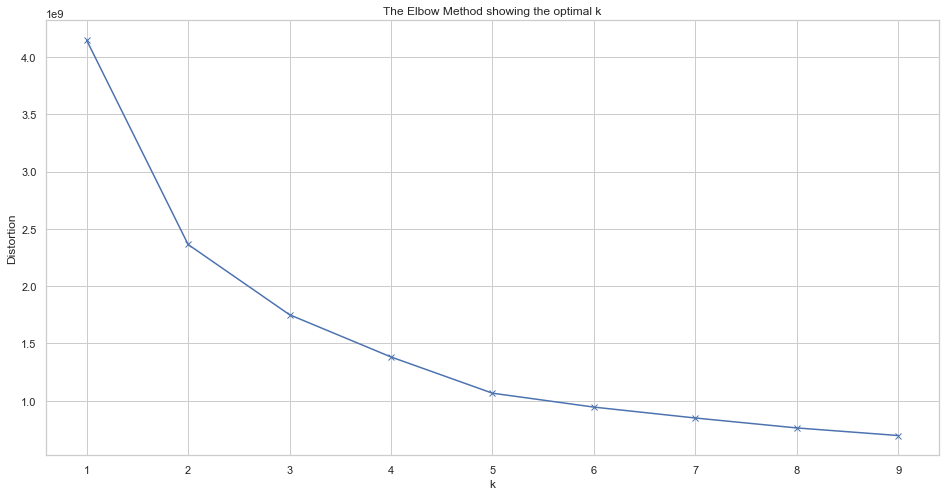

In [41]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Choosing 3 clusters to run kmeans based on the elbow method above

In [42]:
kmeanModel = KMeans(n_clusters=4, random_state = 1)
kmeanModel.fit(df_kmeans_final)

KMeans(n_clusters=4, random_state=1)

In [43]:
df_kmeans_final['cluster'] = kmeanModel.labels_

##### Plotting Num Shares against the other variables, with clusters (assigned by kmeans) as the differentiating colour

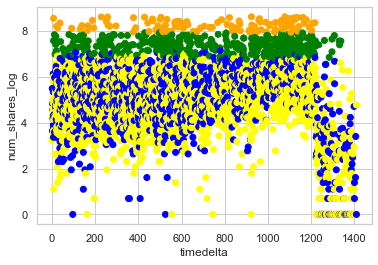

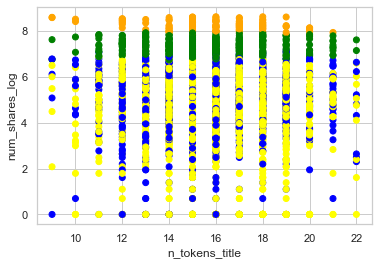

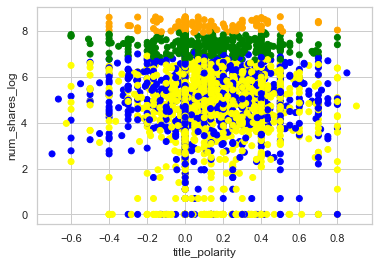

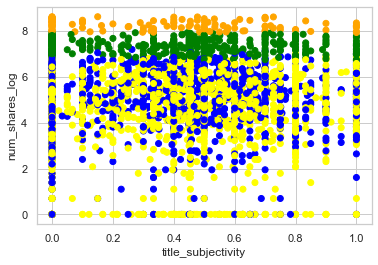

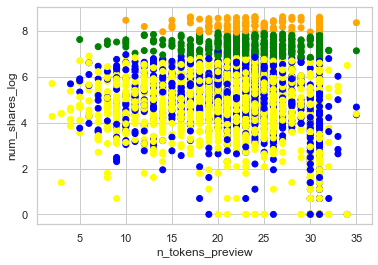

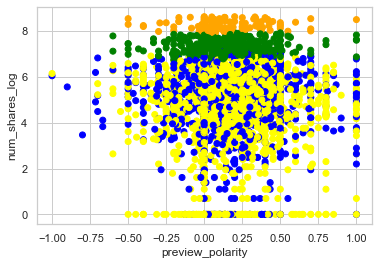

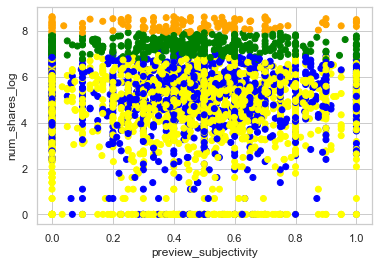

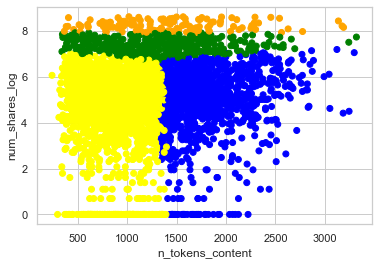

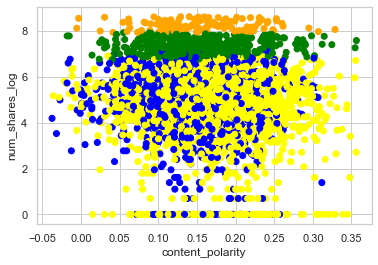

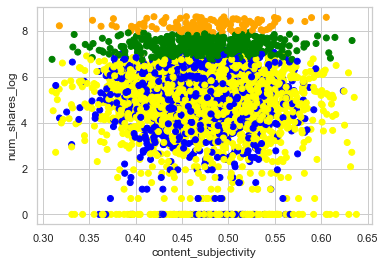

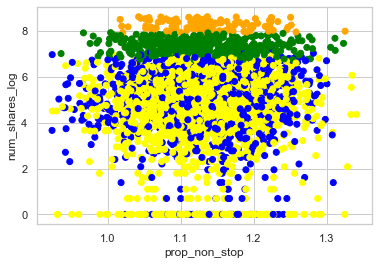

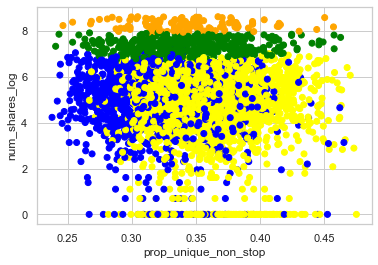

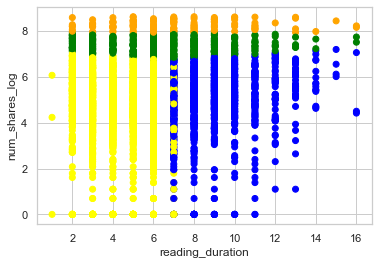

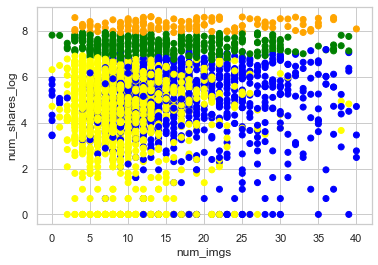

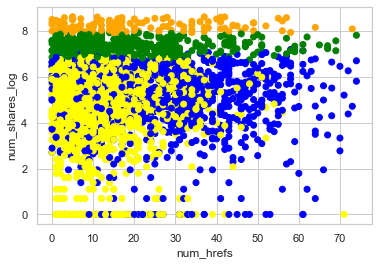

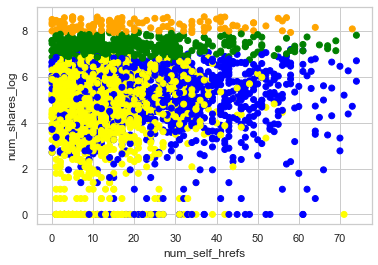

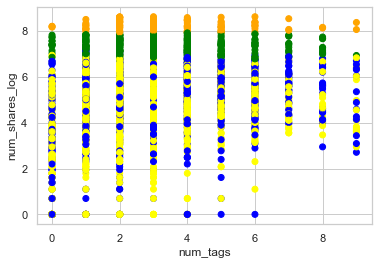

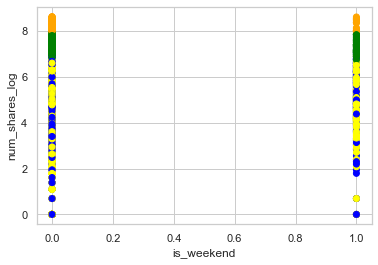

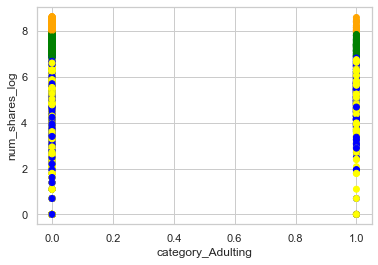

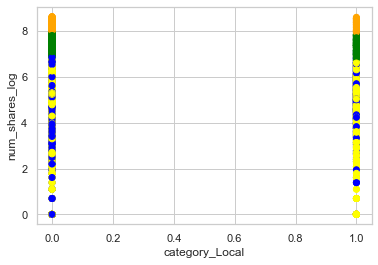

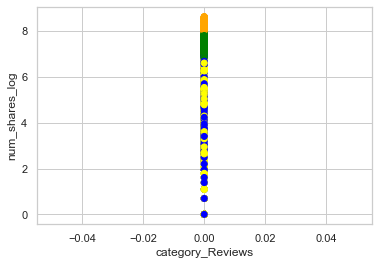

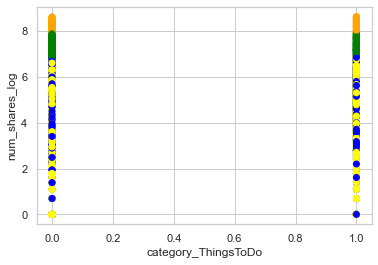

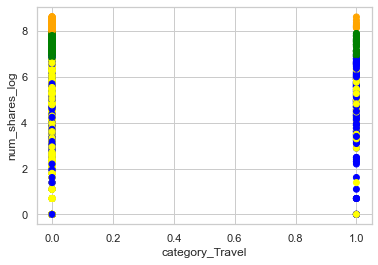

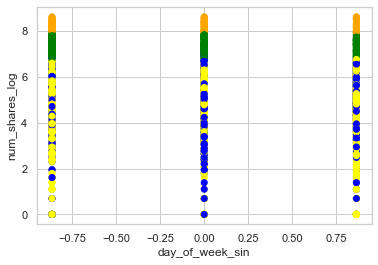

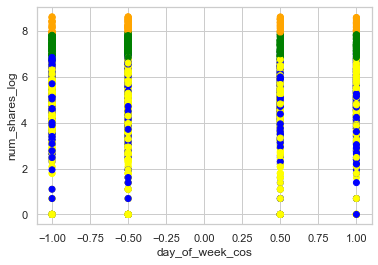

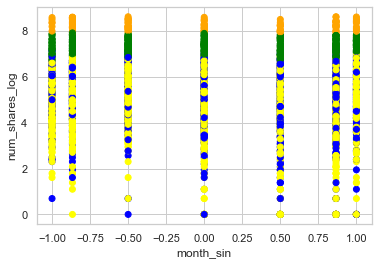

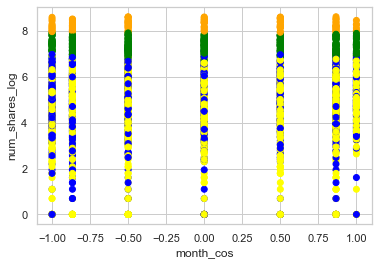

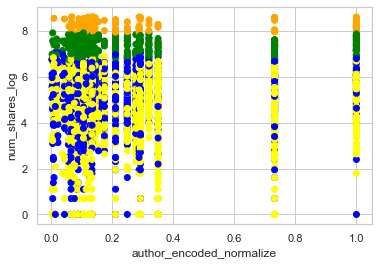

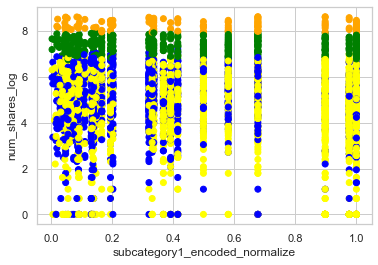

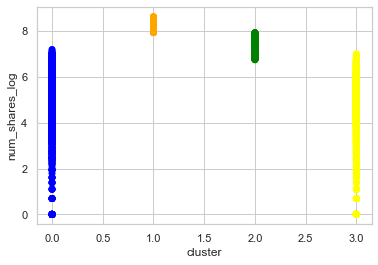

In [44]:

colors = {0:'blue', 1:'orange', 2:'green', 3:'yellow'}
scattor_cols = df_kmeans_final.drop(['num_shares_log', 'num_shares'], axis = 1).copy()

for i in scattor_cols:
    plt.figure()
    plt.scatter(df_kmeans_final[i],df_kmeans_final['num_shares_log'], c=df_kmeans_final['cluster'].map(colors))
    plt.ylabel('num_shares_log')
    plt.xlabel(i)
    plt.show()



##### Unfortunately, no insightful clusters were found using this method.

## PCA

##### Lets trying looking at PCA instead

In [45]:
pca_continuous_var = ['n_tokens_title', 'title_polarity', 'title_subjectivity', 'n_tokens_content', 
    'prop_non_stop', 'prop_unique_non_stop', 'content_polarity', 'content_subjectivity', 
    'reading_duration', 'num_imgs', 'num_hrefs', 'num_self_hrefs', 'num_tags', 'num_shares_log']

df_pca = df_kmeans_final[pca_continuous_var].copy()

share_data_pca = df_pca['num_shares_log']
share_label_pca = []
for share in share_data_pca:
    if share == 0:
        share_label_pca.append('No Shares')
    elif share <= df_pca.num_shares_log.quantile(0.25):
        share_label_pca.append('Low Shares')
    elif share <= df_pca.num_shares_log.quantile(0.50):
        share_label_pca.append('Average Shares')
    else:
        share_label_pca.append('High Shares')

In [46]:

y = df_pca['num_shares_log'].copy()
x = df_pca.drop(['num_shares_log'], axis = 1).copy()
x_cols = x.columns

x = StandardScaler().fit_transform(x)
df_pca_x = pd.DataFrame(x, columns=x_cols)



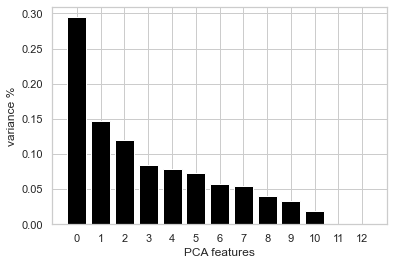

In [47]:
pca = PCA()
principalcomponents = pca.fit_transform(df_pca_x)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalcomponents)

##### From the PCA components chart above, it shows that only the first PCA explains the most variance in the data (~0.33). However, lets use 2 PCA to find potential clusters in a scatter plot

Text(0, 0.5, 'PCA 2')

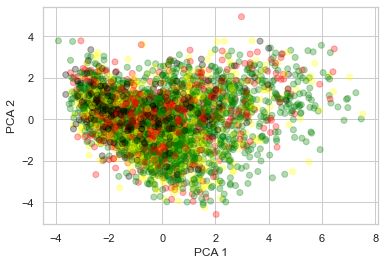

In [48]:
pca_map_cols = {'No Shares': 'black', 'Low Shares': 'red', 'Average Shares': 'yellow', 'High Shares': 'green'}
PCA_components['shares_bin'] = share_label_pca
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, c=PCA_components['shares_bin'].map(pca_map_cols))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

##### Again, no clusters were found using the PCA method. 